In [1]:
# Imports - collect all and move here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import re
import nltk
nltk.download('punkt')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.corpus import brown
nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('averaged_perceptron_tagger')
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
nltk.download('wordnet')
nltk.download('omw-1.4')
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV

[nltk_data] Downloading package punkt to /Users/ali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ali/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading data

In [2]:
data = pd.read_csv('mbti_1.csv')

In [5]:
pd.set_option('display.max_colwidth', 500)
data.head(1)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...


In [6]:
data.shape

(8675, 2)

<Axes: title={'center': 'Type distribution in data'}, ylabel='type'>

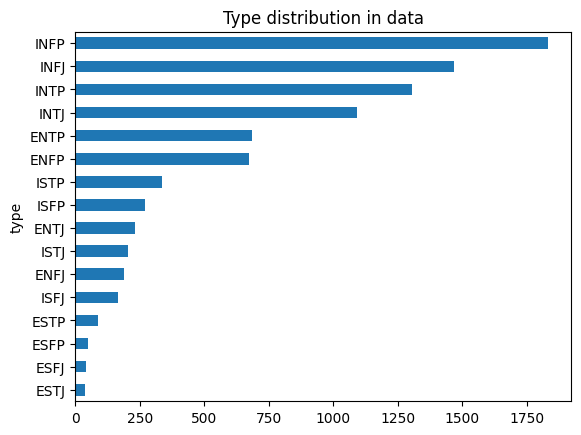

In [7]:
# All 16 types are represented but imbalanced
data['type'].value_counts(ascending = True).plot(kind='barh',
                                                 title = 'Type distribution in data')

In [ ]:
data.iloc[3559] # Found later

# Test sample - cleaning + topic modeling

In [ ]:
# Keyword extraction
vectorizer = TfidfVectorizer()

In [10]:
# Def function for removing ||| delimiters
def remove_delimiters(delimiters, s):
    new_s = s
    for i in delimiters:
        new_s = new_s.replace(i, ' ')
    return ' '.join(new_s.split())

In [13]:
# Expressions to drop
regex_todrop = ['[.+]','[(+]','[+)]','[+/+]','[:+:]','[+?]','[+/+]','[+~]','[+,+]',
                "[+'+]",'[+-+]','[_]']

# NOTE : need to add _ to regex_todrop

In [ ]:
# Testing on 1 post
test_post = data.posts[0].lower()

test_post = remove_delimiters('|||', test_post)

# Dropping numbers - don't appear to have meaning and might mess up modeling later
test_post = ''.join([i for i in test_post if not i.isdigit()])

# First dropping URLs
text = re.sub(r"\S*https?:\S*", "", test_post) # Dropping URLs

# Drop regex
for r in regex_todrop:
    text = re.sub(r, "", text)

# Quick check on first 800 characters
text[:800]

In [ ]:
# Topic modelling
tokens = nltk.word_tokenize(text)
tkns = [w for w in tokens if len(w) >= 4]

tags = nltk.pos_tag(tkns)
nouns = [word for (word, tag) in tags if tag == 'NN']

tfidf = vectorizer.fit_transform(tkns)

sample1 = sorted(vectorizer.vocabulary_,
                 key = lambda x: tfidf[0, vectorizer.vocabulary_[x]],
                 reverse = True)
print(sample1[:10])

# Cleaning

In [8]:
# Joining all text data for cleaning
all_posts = ' '.join(data.posts)

In [30]:
# Dropping URLs, delimiters, numbers
all_posts_cln = re.sub(r"\S*https?:\S*", "", all_posts)
all_posts_cln = re.sub(r'http\S+', "", all_posts_cln)
all_posts_cln = remove_delimiters('|||', all_posts_cln)
all_posts_cln = ''.join([i for i in all_posts_cln if not i.isdigit()])

In [31]:
# Dropping regex
all_text_cln = all_posts_cln

for r in regex_todrop:
    all_text_cln = re.sub(r, "", all_text_cln)

# Correcting case
all_text_cln = all_text_cln.lower()

# Quick check
all_text_cln[2000:2500]

'thing about peer pressure banned for a whole host of two baby deer on left and right munching on a beetle in the middle  using their own blood two cavemen diary todays latest happenings on their designated cave diary wall  i see it as a pokemon world an infj society everyone becomes an all artists are artists because they draw its the idea that counts in forming something of your own like a signature welcome to the robot ranks person who downed my self-esteem cuz im not an avid signature artist '

# EDA

# Topic modeling

In [ ]:
tokens = nltk.word_tokenize(clean_text_all) # full text

# Filtering for nouns
tags = nltk.pos_tag(tokens)
nouns = [word for (word, tag) in tags if tag == 'NN']

# Fit Tfidf to nouns only for topic modeling
tfidf = vectorizer.fit_transform(nouns)

all_nouns = sorted(vectorizer.vocabulary_,
                   key = lambda x: tfidf[0, vectorizer.vocabulary_[x]],
                   reverse = True)

In [ ]:
uniq_nouns = Counter(all_nouns_filt).keys() # dict_keys

print(len(all_nouns), len(uniq_nouns))

In [36]:
# For removing stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
top_100 = [n for n in all_nouns if len(n) >= 4][:200]
top_100 = [w for w in top_100 if w.lower() not in stop_words]
print(top_100)

In [ ]:
posts_100 = list(data.posts[:1100])

In [ ]:
topic_freq = {}

for topic in top_100[:20]:
    topic_freq.setdefault(topic, 0)

In [ ]:
for post in posts_100:
    for topic in topic_freq.keys():
        if topic in post:
            topic_freq[topic] += 1
        else: pass

In [ ]:
topic_freq

In [ ]:
plt.style.use('seaborn-v0_8')

topics_df = pd.Series(topic_freq).to_frame()
topics_df.columns = ['count']
topics_df = topics_df.sort_values(by = 'count', ascending = True)

topics_df.plot.barh(figsize = (8,6), title = 'Most frequent topics in first 100 posts',
                    xlabel = 'Count', fontsize = 10, legend = False);

In [ ]:
# Drop MBTI keywords
mbtis = ['intp','istp','entp','enfp','isfp','infp','intj','infj',
           'estj','entj','esfj','enfj','istj','isfj','estp','esfp',
           'infjs','intps','extj']
top_100_nombti = top_100

for t in mbtis:
    try:
        top_100_nombti.remove(t)
    except: pass
    
print(top_100_nombti)

In [ ]:
topic_freq_2 = {}

for topic in top_100_nombti[:20]:
    topic_freq_2.setdefault(topic, 0)
    
for post in posts_100:
    for topic in topic_freq_2.keys():
        if topic in post:
            topic_freq_2[topic] += 1
        else: pass

topics_df = pd.Series(topic_freq_2).to_frame()
topics_df.columns = ['count']
topics_df = topics_df.sort_values(by = 'count', ascending = True)

topics_df.plot.barh(figsize = (8,6), title = 'Most frequent topics in first 100 posts, MBTI mentions removed',
                    xlabel = 'Count', fontsize = 10, legend = False);

# Wordcloud

# Topics by type

In [ ]:
intp = data[data['type'] == 'INTP']
istp = data[data['type'] == 'ISTP']
entp = data[data['type'] == 'ENTP']
enfp = data[data['type'] == 'ENFP']
isfp = data[data['type'] == 'ISFP']
infp = data[data['type'] == 'INFP']
intj = data[data['type'] == 'INTJ']
infj = data[data['type'] == 'INFJ']
estj = data[data['type'] == 'ESTJ']
entj = data[data['type'] == 'ENTJ']
esfj = data[data['type'] == 'ESFJ']
enfj = data[data['type'] == 'ENFJ']
istj = data[data['type'] == 'ISTJ']
isfj = data[data['type'] == 'ISFJ']
estp = data[data['type'] == 'ESTP']
esfp = data[data['type'] == 'ESFP']

posts_bytype = [intp, istp, entp, enfp, isfp, infp, intj, infj,
                estj, entj, esfj, enfj, istj, isfj, estp, esfp]
lengths = []

for t in posts_bytype:
    lengths.append(len(t))
    
post_counts_bytype = {to_drop[i]: lengths[i] for i in range(len(lengths))}
post_counts_bytype

In [ ]:
def clean_txt(posts):
    txt = ' '.join(posts)
    txt = re.sub(r"\S*https:\S*", "", txt)
    txt = re.sub(r"\S*http:\S*", "", txt) # Fixed, not run
    txt = remove_delimiters('|||', txt)
    txt = ''.join([i for i in txt if not i.isdigit()])
    for r in regex_todrop:
        txt = re.sub(r, "", txt)
    return txt

def get_topics(txt):
    tokens = nltk.word_tokenize(txt)
    tags = nltk.pos_tag(tokens)
    nouns = [word for (word, tag) in tags if tag == 'NN']
    tfidf = vectorizer.fit_transform(nouns)
    all_nouns = sorted(vectorizer.vocabulary_,
                       key = lambda x: tfidf[0, vectorizer.vocabulary_[x]],
                       reverse = True)
    # uniq_nouns = Counter(all_nouns.keys())
    topics = [n for n in all_nouns if len(n) >= 4][:200]
    topics = [w for w in topics if w.lower() not in stop_words] 
    topics = [w for w in topics if w in words]
    return topics

def plot_topics(topics_list, posts_list, title):
    topic_freq = {}
    for topic in topics_list[:15]:
        topic_freq.setdefault(topic, 0)
    for post in posts_list:
        for topic in topic_freq.keys():
            if topic in post:
                topic_freq[topic] += 1
            else: pass
    topics_df = pd.Series(topic_freq).to_frame()
    topics_df.columns = ['count']
    topics_df = topics_df.sort_values(by = 'count', ascending = True)
    topics_df.plot.barh(figsize = (8,5), title = title,
                        xlabel = 'Count', fontsize = 10, legend = False);

In [ ]:
def clean_get_plot_topics(posts, title):
    txt = clean_txt(posts)
    topics = get_topics(txt)
    plot_topics(topics, posts, title)
    
clean_get_plot_topics(infp.posts[:100], 'INFP topics')

In [ ]:
clean_get_plot_topics(infj.posts[:100], 'INFJ topics')

In [ ]:
clean_get_plot_topics(intp.posts[:100], 'INTP topics')

In [ ]:
clean_get_plot_topics(intj.posts, 'INTJ topics')

In [ ]:
clean_get_plot_topics(entp.posts[:100], 'ENTP topics')

In [ ]:
clean_get_plot_topics(enfp.posts[:100], 'ENFP topics')

In [ ]:
clean_get_plot_topics(istp.posts[:100], 'ISTP topics')

In [ ]:
clean_get_plot_topics(isfp.posts[:100], 'ISFP topics')

In [ ]:
clean_get_plot_topics(entj.posts[:100], 'ENTJ topics')

In [ ]:
clean_get_plot_topics(istj.posts[:100], 'ISTJ topics')

In [ ]:
clean_get_plot_topics(enfj.posts, 'ENFJ topics')

In [ ]:
clean_get_plot_topics(isfj.posts, 'ISFJ topics')

In [ ]:
clean_get_plot_topics(estp.posts, 'ESTP topics')

In [ ]:
clean_get_plot_topics(esfp.posts, 'ESFP topics')

In [ ]:
clean_get_plot_topics(esfj.posts, 'ESFJ topics')

In [ ]:
clean_get_plot_topics(estj.posts, 'ESTJ topics')

In [ ]:
# Compare extraverts and introverts
e_posts = data[data['type'].isin(['ENTP','ENFP','ENTJ','ENFJ','ESTP','ESFP','ESFJ','ESTJ'])]
i_posts = data[data['type'].isin(['INFP','INFJ','INTP','INTJ','ISTP','ISFP','ISTJ','ISFJ'])]

clean_get_plot_topics(e_posts.posts, 'Extravert topics')

In [ ]:
clean_get_plot_topics(i_posts.posts, 'Introvert topics')

In [ ]:
# Compare 'feelers' and 'thinkers'
f_posts = data[data['type'].isin(['INFP','INFJ','ENFP','ISFP','ENFJ','ISFJ','ESFP','ESFJ'])]
t_posts = data[data['type'].isin(['INTP','INTJ','ENTP','ISTP','ENTJ','ISTJ','ESTP','ESTJ'])]
               
clean_get_plot_topics(f_posts.posts, 'Feeler topics')

In [ ]:
clean_get_plot_topics(t_posts.posts, 'Thinker topics')

In [ ]:
# Compare 'sensors' and 'intuitives'
s_posts = data[data['type'].isin(['ISTP','ISFP','ISTJ','ISFJ','ESTP','ESFP','ESFJ','ESTJ'])]
n_posts = data[data['type'].isin(['INFP','INFJ','INTP','INTJ','ENTP','ENFP','ENTJ','ENFJ'])]

clean_get_plot_topics(s_posts.posts, 'Sensor topics')

In [ ]:
clean_get_plot_topics(n_posts.posts, 'Intuitive topics')

# Preprocessing

In [ ]:
def clean_post(post):
    txt = post.lower()
    txt = re.sub(r"\S*https:\S*", "", txt)
    txt = re.sub(r"\S*http:\S*", "", txt)
    txt = remove_delimiters('|||', txt)
    txt = ''.join([i for i in txt if not i.isdigit()])
    for r in regex_todrop:
        txt = re.sub(r, "", txt)
    return txt

# data_pretest = data
# data_pretest.posts[0].lower()

for i in range(len(data.index)):
    post = data.posts[i]
    clean = clean_post(post)
    data.posts[i] = clean

In [ ]:
data['tokenized'] = ''

for i in range(len(data_pretest.index)):
    post = data.posts[i]
    tokens = nltk.word_tokenize(post)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [w for w in tokens if w in words]
    data['tokenized'][i] = tokens

In [ ]:
for i in range(len(data.index)):
    sample = data.tokenized[i]
    clean = [w for w in sample if len(w) >= 3]
    data['tokenized'][i] = clean
    
print(data.tokenized[22])

In [ ]:
stemmer = SnowballStemmer('english')
data['stems'] = ''

for i in range(len(data.index)):
    sample = data.tokenized[i]
    data['stems'][i] = [stemmer.stem(w) for w in sample]

In [ ]:
print(data.stems[22])

In [ ]:
data['lemmas'] = ''

for i in range(len(data.index)):
    sample = data.tokenized[i]
    data['lemmas'][i] = [wn_lem.lemmatize(w) for w in sample]
    
print(data.lemmas[22])

# Vectorizing

In [ ]:
data['lemmatized'] = ''

for i in range(len(data.index)):
    data['lemmatized'][i] = ' '.join(data.lemmas[i])

In [ ]:
# Define target
X = data.lemmatized
y = data.type

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 17)

In [ ]:
count_vector = vectorizer.transform(data.posts)

bow = count_vector.toarray()
bow = pd.DataFrame(bow, columns = vectorizer.get_feature_names_out())
bow.head()

# Feature engineering

In [ ]:
# Feature engineering - polarity + subjectivity
TextBlob(data.posts[0]).sentiment

In [ ]:
data['polarity'] = ''
data['subjectivity'] = ''

for i in range(len(data.index)):
    sentiment = TextBlob(data.posts[i]).sentiment
    polarity = sentiment[0]
    data['polarity'][i] = polarity
    subjectivity = sentiment[1]
    data['subjectivity'][i] = subjectivity

In [ ]:
intp = data[data['type'] == 'INTP']
istp = data[data['type'] == 'ISTP']
entp = data[data['type'] == 'ENTP']
enfp = data[data['type'] == 'ENFP']
isfp = data[data['type'] == 'ISFP']
infp = data[data['type'] == 'INFP']
intj = data[data['type'] == 'INTJ']
infj = data[data['type'] == 'INFJ']
estj = data[data['type'] == 'ESTJ']
entj = data[data['type'] == 'ENTJ']
esfj = data[data['type'] == 'ESFJ']
enfj = data[data['type'] == 'ENFJ']
istj = data[data['type'] == 'ISTJ']
isfj = data[data['type'] == 'ISFJ']
estp = data[data['type'] == 'ESTP']
esfp = data[data['type'] == 'ESFP']

In [ ]:
type_dfs_ls = [intp, istp, entp, enfp, isfp, infp, intj, infj,
               estj, entj, esfj, enfj, istj, isfj, estp, esfp]

In [ ]:
data.head(3)

In [ ]:
mean_pol_by_type = data.groupby(by = 'type')['polarity'].agg('mean')
mean_sentiment_by_type = pd.DataFrame(mean_pol_by_type)
mean_sub_by_type = data.groupby(by = 'type')['subjectivity'].agg('mean')
mean_sentiment_by_type['subjectivity'] = mean_sub_by_type
mean_sentiment_by_type

In [ ]:
mean_sentiment_by_type.sort_values(by = 'polarity', ascending = True, inplace = True)
mean_sentiment_by_type['polarity'].plot(kind = 'barh', alpha = .5, color = 'green',
                                        title = 'Polarity by type')

In [ ]:
data.boxplot(column = 'polarity', by = 'type', showfliers = False, figsize = (12,8));

In [ ]:
# Top words for each sample
data.reset_index(inplace = True)
data['top_words'] = ''

for i in range(len(data.index)):
    sample = data.posts[i]
    topics = get_topics(sample)
    data['top_words'][i] = topics[:10]
    
data.head()

- look up AllenNLP
- try SpaCy or Polyglot pos tagging vs. nltk
- look up sentence segmentation
- look up Gensim for semantic search

# Modeling

In [ ]:
models = pd.DataFrame(index = ['Naive Bayes', 'Random Forest', 'Logistic Regression'],
                      columns = ['min_df', 'params', 'roc_auc_score'])

In [ ]:
for i in range(20):
    vect = CountVectorizer(min_df = i)
    X_train